<a href="https://colab.research.google.com/github/noran97/NTI-AI-projects/blob/main/CNN_Resnet50_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import *
from keras.layers import *
from tensorflow.keras.applications import resnet50

In [ ]:
!wget http://cb.lk/covid_19

--2024-08-22 07:49:07--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2024-08-22 07:49:08--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/8jafvmu9s23e3bpmaou3c/CovidDataset-20200427T133042Z-001.zip?rlkey=p1slfgi51d7cmi5161ixvicmq&dl=0 [following]
--2024-08-22 07:49:09--  https://www.dropbox.com/scl/fi/8jafvmu9s23e3bpmaou3c/CovidDataset-20200427T133042Z-001.zip?rlkey=p1slfgi51d7cmi5161ixvicmq&dl=0
Reusing existing 

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        r'/content/CovidDataset/Train',
        target_size=(224, 224),
        batch_size=32)
        #class_mode='binary')

test_set = test_datagen.flow_from_directory(
        r'/content/CovidDataset/Val',
        target_size=(224, 224),
        batch_size=32)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(training_set,epochs=20,validation_data=test_set,verbose=1)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.4767 - loss: 1.5531 - val_accuracy: 0.5000 - val_loss: 0.6582
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 348ms/step - accuracy: 0.6336 - loss: 0.6421 - val_accuracy: 0.9000 - val_loss: 0.3620
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 413ms/step - accuracy: 0.8810 - loss: 0.3131 - val_accuracy: 0.9167 - val_loss: 0.3211
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - accuracy: 0.8952 - loss: 0.3033 - val_accuracy: 0.9500 - val_loss: 0.2016
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - accuracy: 0.9217 - loss: 0.2182 - val_accuracy: 0.9333 - val_loss: 0.2868
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step - accuracy: 0.9168 - loss: 0.3231 - val_accuracy: 0.9333 - val_loss: 0.2251
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/step - accuracy: 0.9292 - loss: 0.2144 - val_accuracy: 0.9500 - val_loss: 0.1955
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 557ms/step - accuracy: 0.9369 - loss: 0.1546 - val_accuracy: 0.9500 - val_los

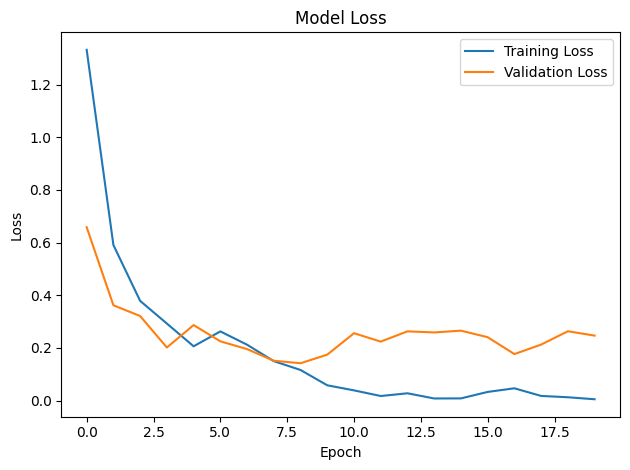

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

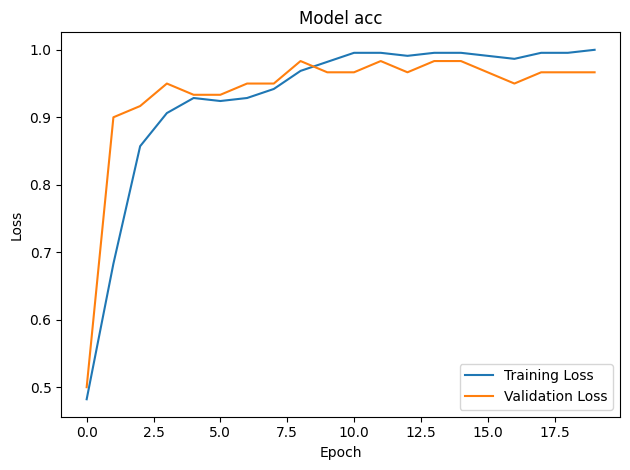

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation Loss')
plt.title('Model acc')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(training_set.num_classes, activation='softmax')(x)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
history = model.fit(training_set ,epochs=20,validation_data=test_set)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  7/224 ━━━━━━━━━━━━━━━━━━━━ 21:01 6s/step - accuracy: 0.4634 - loss: 0.7653

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


224/224 ━━━━━━━━━━━━━━━━━━━━ 82s 268ms/step - accuracy: 0.4729 - loss: 0.7373 - val_accuracy: 0.5000 - val_loss: 0.6864
Epoch 2/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 70s 214ms/step - accuracy: 0.5005 - loss: 0.6968 - val_accuracy: 0.6000 - val_loss: 0.6707
Epoch 3/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 63s 223ms/step - accuracy: 0.5047 - loss: 0.6711 - val_accuracy: 0.9000 - val_loss: 0.6522
Epoch 4/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 58s 220ms/step - accuracy: 0.5976 - loss: 0.6489 - val_accuracy: 0.6500 - val_loss: 0.6377
Epoch 5/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 58s 216ms/step - accuracy: 0.8600 - loss: 0.6231 - val_accuracy: 0.8167 - val_loss: 0.6213
Epoch 6/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 82s 212ms/step - accuracy: 0.8393 - loss: 0.6149 - val_accuracy: 0.9167 - val_loss: 0.6037
Epoch 7/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 60s 220ms/step - accuracy: 0.9280 - loss: 0.5953 - val_accuracy: 0.8667 - val_loss: 0.5896
Epoch 8/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 68s 257ms/step - accuracy: 0.8790 - loss: 0.5797 - val

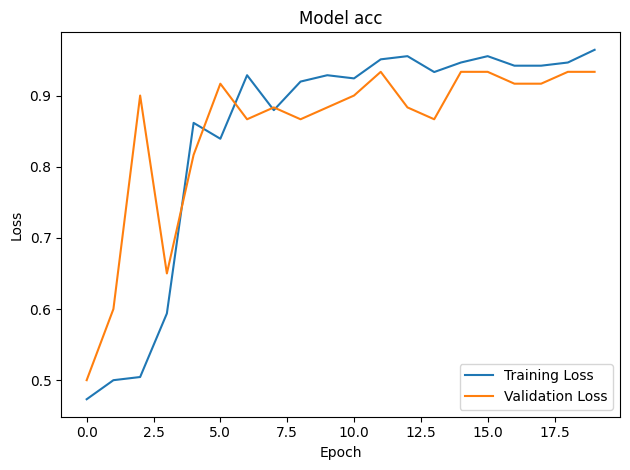

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation Loss')
plt.title('Model acc')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()